<a href="https://colab.research.google.com/github/Sowmya627/SCT_DS_02/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Import Libraries & Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
titanic = sns.load_dataset('titanic')
print(titanic.head())
print(titanic.info())
print(titanic.describe())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

2.Data Cleaning
*  Check missing values



In [ ]:
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


Handle missing values

In [ ]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic.drop(columns=['deck'], inplace=True, errors='ignore')
print(titanic.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


3.Exploratory Data Analysis
*    Survival Rate






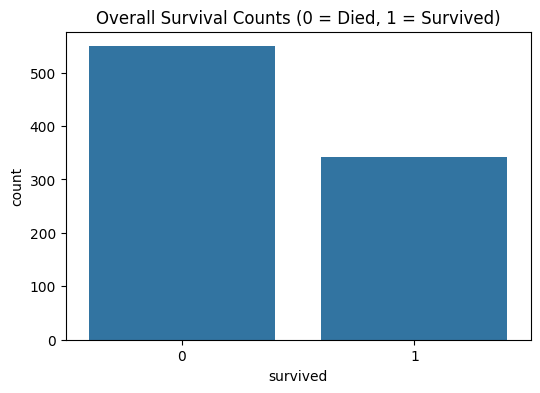

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="survived", data=titanic)
plt.title("Overall Survival Counts (0 = Died, 1 = Survived)")
plt.show()
print(titanic['survived'].value_counts(normalize=True))

Around 38% survived.

*   Gender & Survival



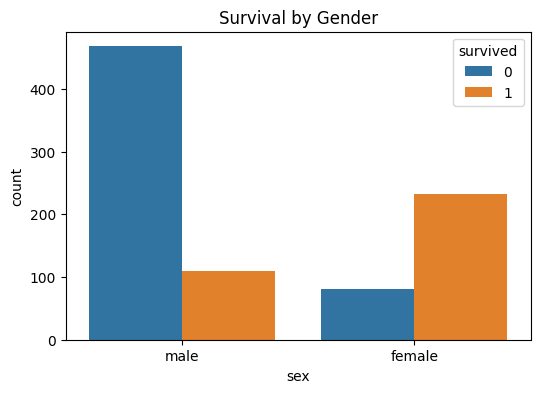

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="sex", hue="survived", data=titanic)
plt.title("Survival by Gender")
plt.show()

Women had much higher survival rates than men.

* Passenger class & survival



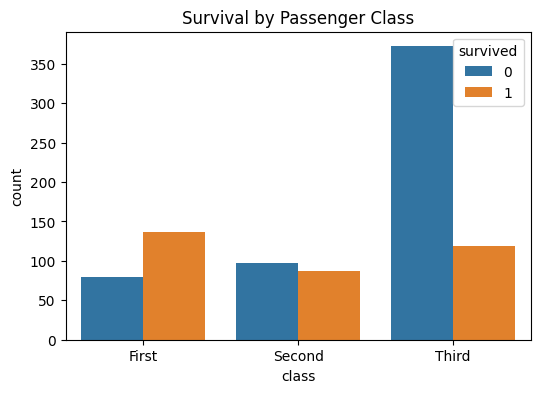

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="class", hue="survived", data=titanic, order=["First","Second","Third"])
plt.title("Survival by Passenger Class")
plt.show()

First-class passengers survived more than third-class

* Age distribution



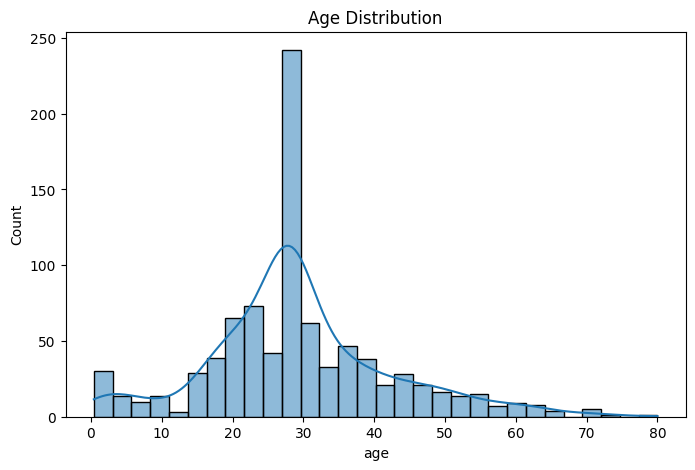

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(titanic['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

More passengers were between 20-40 years old

*  Age vs survival



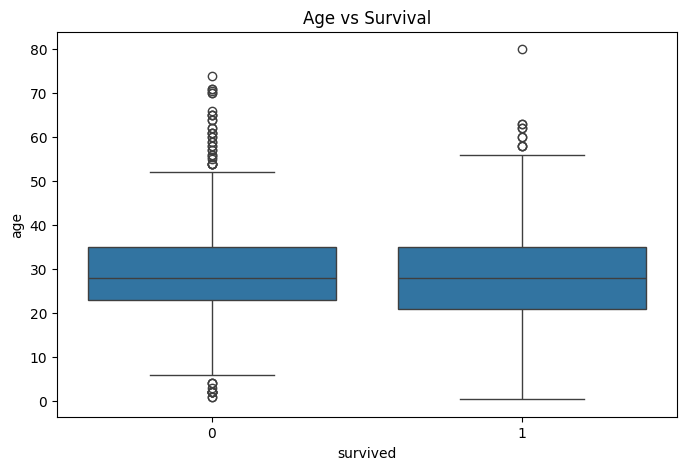

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="survived", y="age", data=titanic)
plt.title("Age vs Survival")
plt.show()

Younger passengers(especially children) had higher survival

* Correlation heatmap



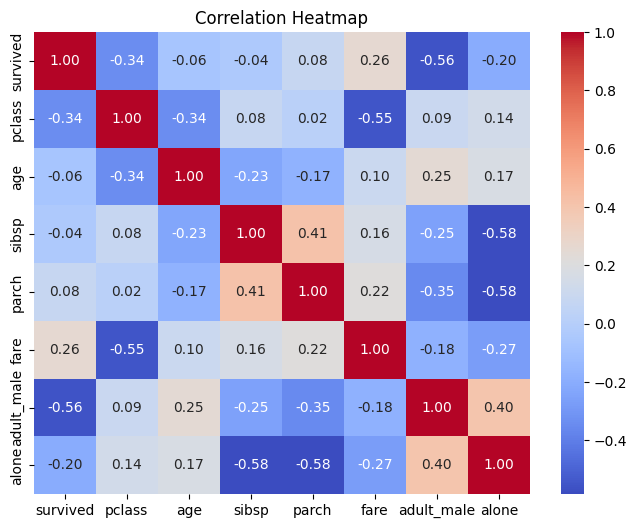

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Fare and class strongly influence survival; age has weaker correlation

4. Key Patterns & Trends
*  "Women survived much more than men"
*  "First-class survival > Second > Third"
*  "Younger children had higher chances"
*  "Higher fare = higher survival probability"




